In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
x = np.linspace(-6, 6, 100)
y = np.sqrt(10**2-x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [3]:
x1 = np.linspace(-6, 6, 100)
y1 = np.sqrt(4**2-x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

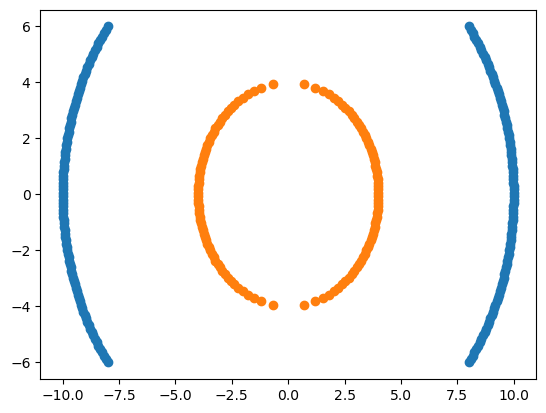

In [4]:
plt.scatter(y,x)
plt.scatter(y1, x1)

In [5]:
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df

,X1,X2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
395,NaN,-5.515152,1
396,NaN,-5.636364,1
397,NaN,-5.757576,1
398,NaN,-5.878788,1


In [6]:
df1 = df.copy()

In [7]:
df1

,X1,X2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
395,NaN,-5.515152,1
396,NaN,-5.636364,1
397,NaN,-5.757576,1
398,NaN,-5.878788,1


In [8]:
df1["x1square"] = df1["X1"]**2
df1["x2square"] = df1["X2"]**2
df1["x1x2"] = df1["X1"]*df1["X2"]
df1.head()

,X1,X2,Y,x1square,x2square,x1x2
0,8.000000,-6.000000,0,64.000000,36.000000,-48.000000
1,8.089490,-5.878788,0,65.439853,34.560147,-47.556397
2,8.176205,-5.757576,0,66.850321,33.149679,-47.075117
3,8.260230,-5.636364,0,68.231405,31.768595,-46.557662
4,8.341649,-5.515152,0,69.583104,30.416896,-46.005457


In [20]:
df1 = df1.dropna()
X = df1[["x1square", "x2square", "x1x2"]]
y = df1['Y']

In [21]:
X

,x1square,x2square,x1x2
0,64.000000,36.000000,-48.000000
1,65.439853,34.560147,-47.556397
2,66.850321,33.149679,-47.075117
3,68.231405,31.768595,-46.557662
4,69.583104,30.416896,-46.005457
...,...,...,...
378,4.066116,11.933884,6.965957
379,3.213958,12.786042,6.410445
380,2.332415,13.667585,5.646103
381,1.421488,14.578512,4.552271


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Y, Length: 332, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [24]:
# !pip install plotly

In [25]:
import plotly.express as px

In [26]:
px.scatter_3d(df1, x = "x1square", y = "x2square", z = "x1x2")

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = "linear")
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [28]:
df = df.dropna()

In [29]:
df

,X1,X2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
378,-2.016461,-3.454545,1
379,-1.792751,-3.575758,1
380,-1.527225,-3.696970,1
381,-1.192262,-3.818182,1


In [31]:
X=df[["X1", "X2"]]
y = df["Y"]

In [32]:
X

,X1,X2
0,8.000000,-6.000000
1,8.089490,-5.878788
2,8.176205,-5.757576
3,8.260230,-5.636364
4,8.341649,-5.515152
...,...,...
378,-2.016461,-3.454545
379,-1.792751,-3.575758
380,-1.527225,-3.696970
381,-1.192262,-3.818182


In [33]:
y

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Y, Length: 332, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = "rbf")
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = "poly")
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.62

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = "sigmoid")
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.65